In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training data exploration & Preprocessing

In [2]:
# #Load random sample from train.csv
# import random

# filename = 'Data\\train.csv'
# n = sum(1 for line in open(filename)) - 1 #number of records in file
# s = 10**6 #sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# train_data = pd.read_csv(filename, skiprows=skip)
# train_data.to_csv('Data\\train_data_large_sample.csv', index=False)

In [3]:
#train_data = pd.read_csv('Data\\train_data_sample.csv')
train_data = pd.read_csv('Data\\train_data_large_sample.csv')

In [4]:
#Load features.csv
features = pd.read_csv('Data\\features.csv')

In [5]:
#Load test set
test = pd.read_csv('Data\\example_test.csv')

### Training data

In [6]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,NaN,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8
2,0,0.109651,0.006899,0.003405,0.000134,-0.003040,-0.000690,1,-3.172026,-3.093182,...,NaN,2.324290,4.881133,2.115830,6.337250,3.059392,5.350729,2.755876,4.968388,10
3,0,0.199435,-0.005512,-0.003395,-0.003271,-0.006691,-0.002144,1,-3.172026,-3.093182,...,NaN,2.597309,5.083280,1.687634,5.044738,2.580474,4.350003,2.633767,4.498077,11
4,0,0.759367,0.018205,0.003462,-0.043791,-0.081529,-0.055979,-1,9.613324,4.845985,...,NaN,4.309172,1.908502,4.983727,3.835457,6.078076,2.639964,4.495521,1.569983,13


In [7]:
train_data.shape

(1000000, 138)

In [8]:
train_data[train_data['weight']==0].shape

(170641, 138)

In [9]:
#Create copy of raw training dataset
train_data_ = train_data.copy()

In [10]:
#train_data_ = train_data_[train_data_['weight']!=0] #Remove records with weight=0

In [11]:
train_data_.shape

(1000000, 138)

In [12]:
len(train_data_)/len(train_data)

1.0

NAs:

In [13]:
train_nan = pd.DataFrame((train_data.isna().sum()/len(train_data)*100).sort_values(ascending=False),columns=['pct_NaN'])

In [14]:
test_ = test[test['weight']!=0] #remove records with weight=0 from test set

In [15]:
nan_pct = pd.merge(train_nan, pd.DataFrame((test_.isna().sum()/len(test_)*100).sort_values(ascending=False),columns=['pct_NaN']),left_index=True, right_index=True).rename(columns={'pct_NaN_x':'pct_NaN_train', 'pct_NaN_y':'pct_NaN_test'})
nan_pct.head(30)

,pct_NaN_train,pct_NaN_test
feature_18,16.5488,13.322578
feature_28,16.5488,13.322578
feature_27,16.5488,13.322578
feature_17,16.5488,13.322578
feature_7,16.4435,13.280122
feature_8,16.4435,13.280122
feature_90,14.6826,12.312134
feature_84,14.6826,12.312134
feature_96,14.6826,12.312134
feature_78,14.6826,12.312134


In [16]:
#Remove features with high ratio of nan entries
features_remove = nan_pct[(nan_pct['pct_NaN_train']>10)|(nan_pct['pct_NaN_test']>10)].index.values
train_data_ = train_data_.drop(columns=features_remove)

Resp features:

In [17]:
train_data_[['resp_1','resp_2','resp_3','resp_4','resp']]

,resp_1,resp_2,resp_3,resp_4,resp
0,0.009916,0.014079,0.008773,0.001390,0.006270
1,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677
2,0.006899,0.003405,0.000134,-0.003040,-0.000690
3,-0.005512,-0.003395,-0.003271,-0.006691,-0.002144
4,0.018205,0.003462,-0.043791,-0.081529,-0.055979
...,...,...,...,...,...
999995,0.000486,0.000486,-0.004090,-0.008105,-0.005441
999996,0.000272,0.000272,0.000798,0.005168,0.007146
999997,0.000298,0.000298,-0.005393,-0.012472,-0.006681
999998,0.000083,0.000083,-0.000720,-0.000198,0.000428


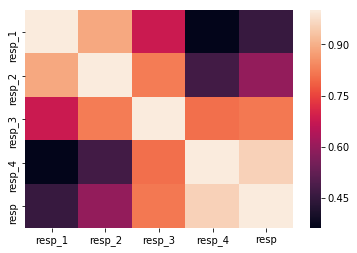

In [18]:
import seaborn as sns

sns.heatmap(train_data_[['resp_1','resp_2','resp_3','resp_4','resp']].corr())
plt.show()

### Features

In [19]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [20]:
features = features.set_index('feature')

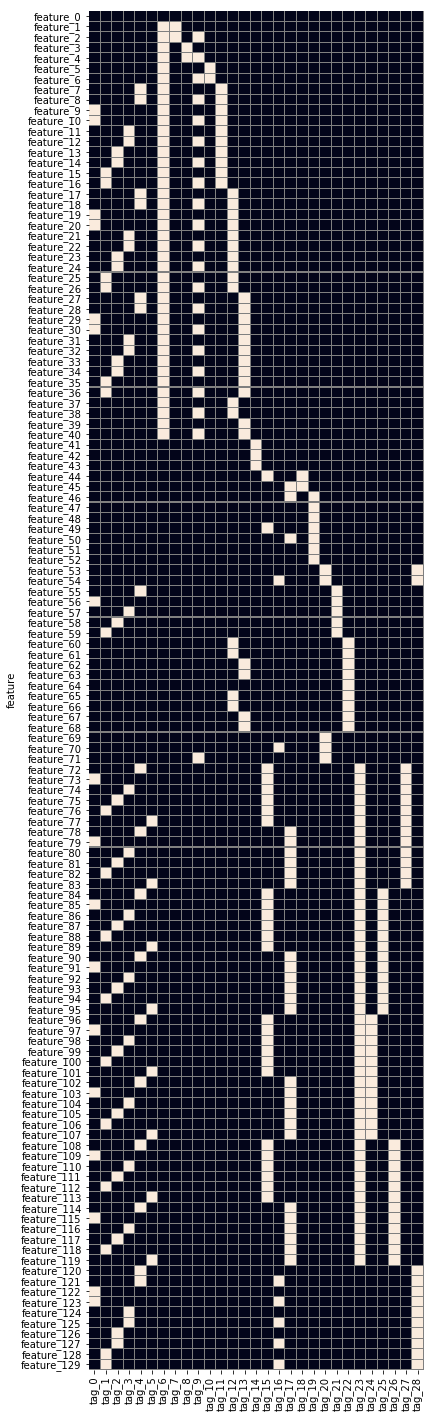

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,25))     
sns.heatmap(features*1,cbar=False, linewidths=0.05, linecolor='gray')
plt.show()

### Feature Histograms

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


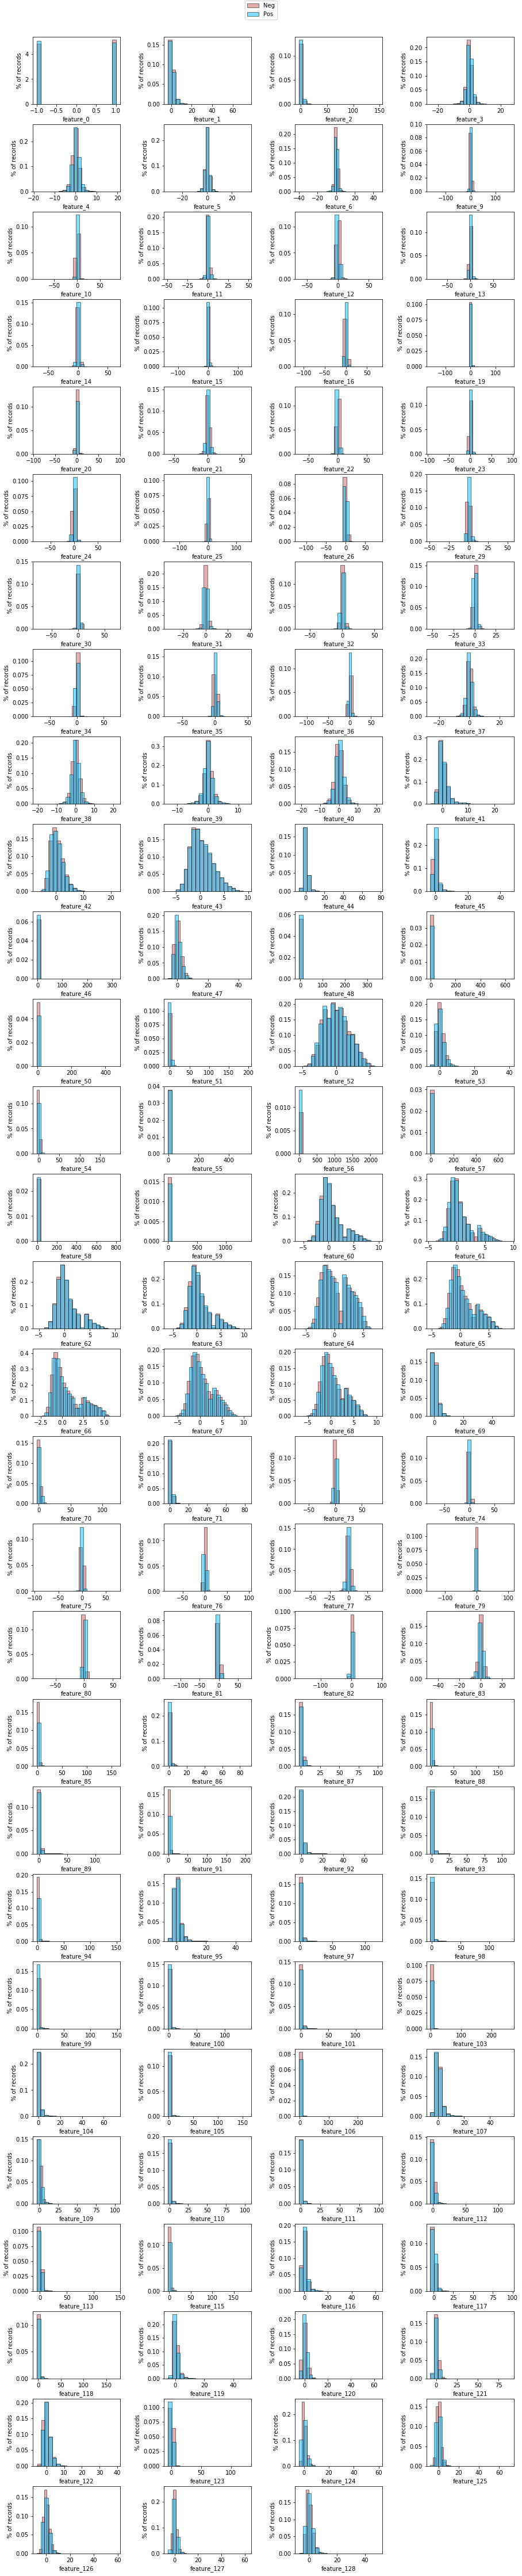

In [112]:
train_data_pos = train_data_[train_data_['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_[train_data_['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,80))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(33,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

Find and remove outliers:

In [22]:
def outlier_detector(x, k=1.5):
    #Find outliers using Tukey's fences method
    Q1 = np.nanquantile(x,0.25)
    Q3 = np.nanquantile(x,0.75)
    outliers = list(x[x<Q1-k*(Q3-Q1)].index.values)
    outliers = outliers + list(x[x>Q3+k*(Q3-Q1)].index.values)
    return outliers

In [23]:
k = 5 #outlier detection constant

In [24]:
pct_outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    n_outliers = len(outlier_detector(train_data_[feature],k=k))/len(train_data_[feature])*100
    pct_outliers.append(n_outliers)
pct_outliers = pd.DataFrame(pct_outliers, index=train_data_.iloc[:,7:-2].columns.values)

In [25]:
pct_outliers.rename(columns={0:'pct_outliers'}).sort_values(by='pct_outliers',ascending=False)

,pct_outliers
feature_56,2.0961
feature_55,1.7396
feature_86,1.5419
feature_57,1.5188
feature_110,1.4817
...,...
feature_61,0.0000
feature_60,0.0000
feature_52,0.0000
feature_43,0.0000


In [26]:
#Find records with outliers on any feature
outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    outliers = outliers + outlier_detector(train_data_[feature],k=k)
outliers = list(set(outliers))

In [27]:
#Remove outliers from dataset (from dataset that already excludes columns with too many NaNs)
train_data_clean = train_data_.loc[~train_data_.index.isin(outliers)]

In [28]:
len(train_data_clean)/len(train_data_)

0.887568

Re-plot histograms after removing outliers

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


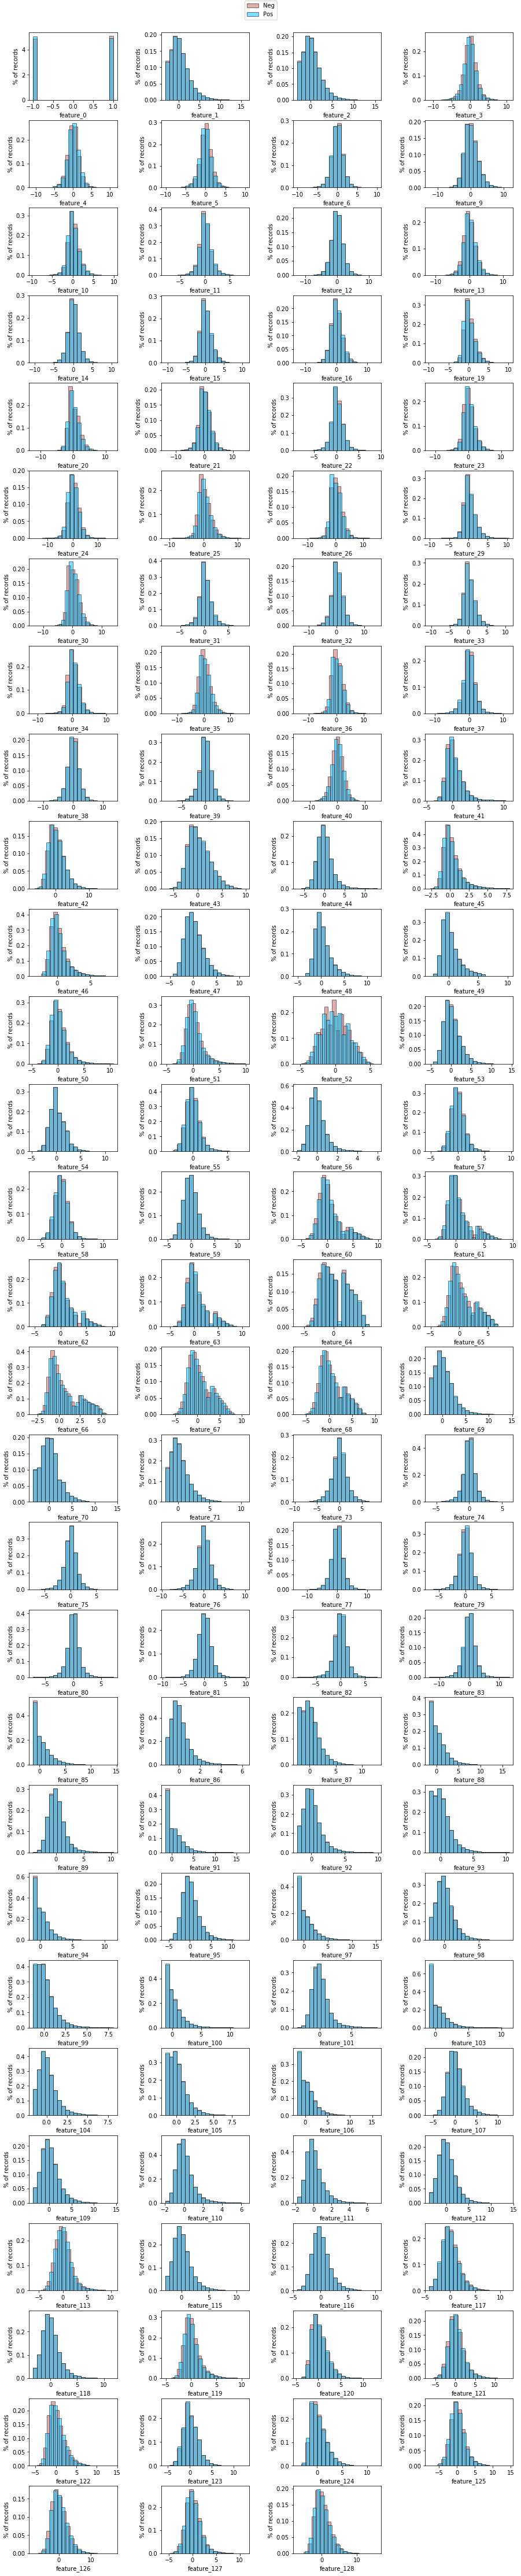

In [29]:
train_data_pos = train_data_clean[train_data_clean['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_clean[train_data_clean['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_clean.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(29,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

In [30]:
#Split features and y/resp
X = train_data_clean.iloc[:,7:-2]
y = train_data_clean['resp']

In [31]:
#One hot encode feature_0 (categorical)
one_hot = pd.get_dummies(X['feature_0']).rename(columns={-1:'feature_0_neg',1:'feature_0_pos'})
X = X.drop(columns=['feature_0']).join(one_hot)

In [32]:
#Remove rows with NaNs
X_clean = X.dropna()
y_clean = y.loc[~y.index.isin(X[X.isnull().any(axis=1)].index.values)]
len(X_clean)/len(X)

0.9582465794170136

In [33]:
#Standardise features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_clean.iloc[:,:-2])
X_norm = scaler.transform(X_clean.iloc[:,:-2])
X_norm = pd.DataFrame(X_norm, index=X_clean.index.values, columns=X_clean.columns.values[:-2])
#Add one-hot encoded feature_0
X_norm = X_norm.merge(X_clean.iloc[:,-2:],left_index=True, right_index=True)

In [34]:
X_norm.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_9,feature_10,feature_11,feature_12,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_0_neg,feature_0_pos
count,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,...,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,8.505090e+05,850509.000000,850509.000000
mean,-1.357691e-14,-7.808234e-15,-8.396278e-17,2.664187e-16,-2.291858e-16,-6.916676e-16,-1.007867e-16,2.691777e-16,1.194090e-15,-3.416520e-17,...,2.856038e-16,-6.145296e-16,1.282626e-15,2.277367e-16,-3.317523e-16,1.134058e-16,7.894627e-17,-4.921798e-16,0.496552,0.503448
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.499988,0.499988
min,-1.494373e+00,-1.538621e+00,-6.199512e+00,-6.578395e+00,-6.371574e+00,-6.419747e+00,-5.898303e+00,-6.787053e+00,-6.270504e+00,-6.666357e+00,...,-3.390585e+00,-2.903998e+00,-3.375214e+00,-2.531855e+00,-3.851489e+00,-3.320267e+00,-3.714674e+00,-3.272447e+00,0.000000,0.000000
25%,-6.876664e-01,-6.916060e-01,-5.679173e-01,-5.878433e-01,-5.573369e-01,-5.537241e-01,-6.679531e-01,-6.213248e-01,-5.510167e-01,-6.000256e-01,...,-6.585119e-01,-7.128086e-01,-6.574310e-01,-7.320918e-01,-6.585453e-01,-7.170433e-01,-6.493880e-01,-7.136734e-01,0.000000,0.000000
50%,-1.432834e-01,-1.300986e-01,-4.534469e-03,-6.137243e-05,4.166669e-03,1.138435e-02,-9.870591e-02,-9.522883e-02,-6.011823e-02,-1.358027e-02,...,-1.169032e-01,-1.600406e-01,-1.269207e-01,-1.919101e-01,-8.563081e-02,-1.298620e-01,-1.031260e-01,-1.432668e-01,0.000000,1.000000
75%,5.145038e-01,5.367469e-01,5.709607e-01,5.940842e-01,5.672180e-01,5.707303e-01,5.725237e-01,5.421601e-01,5.096960e-01,5.871802e-01,...,5.237159e-01,5.317034e-01,5.979444e-01,5.386053e-01,5.630077e-01,5.833683e-01,5.543909e-01,5.574535e-01,1.000000,1.000000
max,6.718273e+00,6.971510e+00,5.957216e+00,6.610028e+00,6.288693e+00,6.438577e+00,5.309280e+00,6.743439e+00,6.247739e+00,6.702960e+00,...,6.635855e+00,6.888312e+00,7.309865e+00,7.005577e+00,7.103581e+00,6.783539e+00,7.006732e+00,7.037837e+00,1.000000,1.000000


In [35]:
len(X_norm)/len(train_data)

0.850509

Pairwise correlation with resp:

In [36]:
corr = pd.DataFrame(X_norm.corrwith(y)).rename(columns={0:'corr'})
corr['abs_corr'] = abs(corr['corr'])
corr = corr.sort_values(by='abs_corr', ascending=False)
corr

,corr,abs_corr
feature_31,0.037321,0.037321
feature_33,0.031864,0.031864
feature_39,0.028128,0.028128
feature_35,0.026178,0.026178
feature_29,0.024974,0.024974
...,...,...
feature_61,-0.000334,0.000334
feature_60,-0.000265,0.000265
feature_45,0.000247,0.000247
feature_46,0.000195,0.000195


Plot heatmap of features and tags, coloured based on the pairwise correlation of each feature with resp:

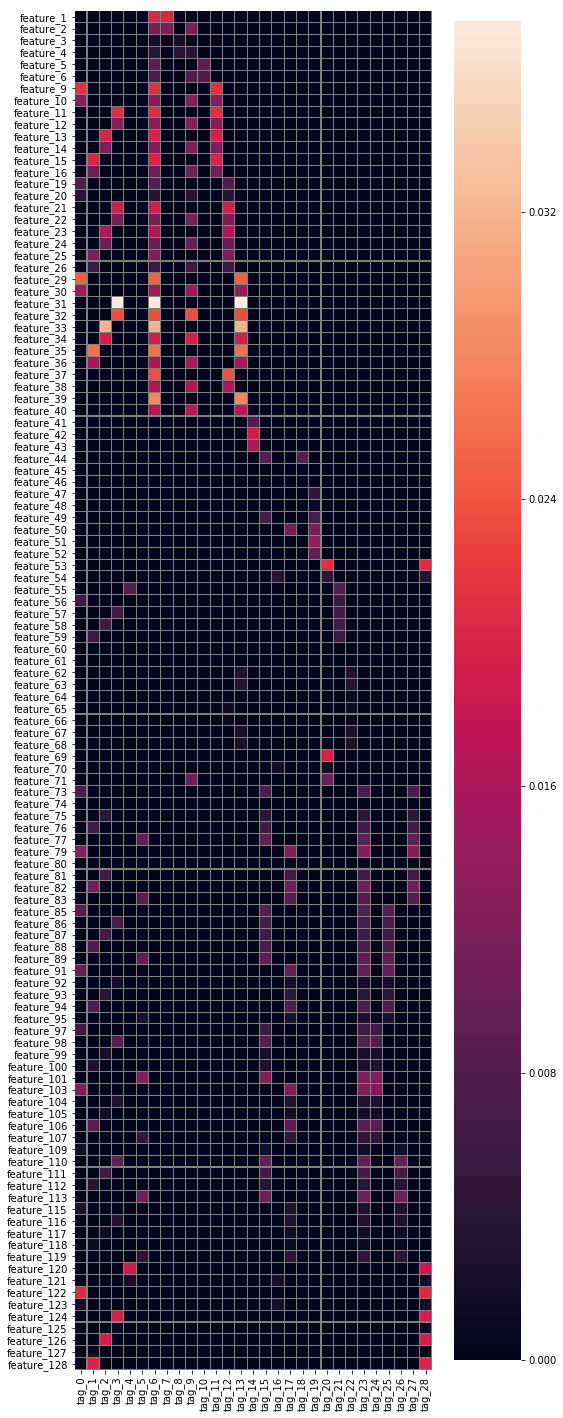

In [37]:
features_corr = (features*1).mul(corr['abs_corr'],axis=0).fillna(0).drop(['feature_0','feature_0_neg','feature_0_pos'])

fig, ax = plt.subplots(figsize=(8,25))     
sns.heatmap(features_corr.loc[X_norm.columns.values[:-2]],cbar=True, linewidths=0.05, linecolor='gray')
plt.show()

In [38]:
#Sum of correlation scores by tag
features_corr.sum(axis=0).sort_values(ascending=False)

tag_6     0.548920
tag_13    0.250449
tag_23    0.239882
tag_9     0.218728
tag_3     0.186613
tag_0     0.173775
tag_2     0.169151
tag_1     0.165181
tag_15    0.145897
tag_11    0.129928
tag_12    0.128996
tag_28    0.128253
tag_17    0.120675
tag_27    0.066687
tag_25    0.064353
tag_24    0.063488
tag_5     0.061536
tag_20    0.056604
tag_19    0.046745
tag_26    0.045354
tag_14    0.043028
tag_21    0.033463
tag_7     0.031871
tag_4     0.029120
tag_10    0.016834
tag_22    0.016254
tag_16    0.011018
tag_18    0.008640
tag_8     0.006303
dtype: float64

In [39]:
#Average correlation score by tag
features_corr.replace(0,np.NaN).mean(axis=0).sort_values(ascending=False)

tag_13    0.017889
tag_11    0.016241
tag_6     0.016145
tag_7     0.015936
tag_14    0.014343
tag_9     0.012152
tag_28    0.011659
tag_20    0.011321
tag_3     0.010977
tag_1     0.010324
tag_0     0.010222
tag_2     0.009950
tag_4     0.009707
tag_12    0.009214
tag_10    0.008417
tag_5     0.007692
tag_21    0.006693
tag_19    0.006678
tag_27    0.006669
tag_15    0.006632
tag_25    0.006435
tag_24    0.006349
tag_23    0.005997
tag_17    0.005247
tag_26    0.004535
tag_18    0.004320
tag_8     0.003152
tag_16    0.001836
tag_22    0.001806
dtype: float64

In [40]:
corr[corr['abs_corr']>=corr['abs_corr'].quantile(0.75)].index.values

array(['feature_31', 'feature_33', 'feature_39', 'feature_35',
       'feature_29', 'feature_37', 'feature_32', 'feature_9',
       'feature_53', 'feature_11', 'feature_122', 'feature_1',
       'feature_15', 'feature_128', 'feature_13', 'feature_69',
       'feature_124', 'feature_126', 'feature_34', 'feature_21',
       'feature_42', 'feature_120', 'feature_0_pos', 'feature_0_neg',
       'feature_40', 'feature_23', 'feature_38', 'feature_43',
       'feature_36'], dtype=object)

In [41]:
#Selected features with at least one of top x% tags by mean corr
selected_tags = features_corr.replace(0,np.NaN).mean(axis=0).sort_values(ascending=False).index.values[0:int(features_corr.shape[1]/4)]
selected_features = (features[selected_tags]*1).sum(axis=1)
selected_features = selected_features[selected_features>0].index.values

In [42]:
len(selected_features)/len(features)

0.46153846153846156

**PCA**

In [43]:
#Run PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=X_norm.shape[1])

pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19978752, 0.33997154, 0.43232067, 0.50737203, 0.5629144 ,
       0.60483537, 0.64304161, 0.67838431, 0.71212804, 0.74504321,
       0.77040177, 0.79263311, 0.81310371, 0.83172874, 0.84513457,
       0.85778003, 0.86830631, 0.87852548, 0.88857441, 0.89786343,
       0.90438266, 0.91069686, 0.91648776, 0.92209757, 0.92760959,
       0.93293086, 0.9377295 , 0.9421146 , 0.94630709, 0.95004624,
       0.95323903, 0.95631265, 0.95904196, 0.96154711, 0.96385276,
       0.96613145, 0.96803035, 0.96984486, 0.97155747, 0.97318094,
       0.97475066, 0.97628496, 0.97777497, 0.97925551, 0.98047151,
       0.98162717, 0.98274962, 0.98384733, 0.98485596, 0.98579541,
       0.98670735, 0.98760042, 0.98846402, 0.98928186, 0.99003133,
       0.99072302, 0.99137486, 0.9919217 , 0.9924266 , 0.99292483,
       0.99340771, 0.99386743, 0.99428557, 0.99469991, 0.99507618,
       0.99540285, 0.99570819, 0.99598374, 0.99624763, 0.9965086 ,
       0.99675758, 0.99699828, 0.99722171, 0.99743678, 0.99763

In [45]:
n_keep = 30
np.sum(pca.explained_variance_ratio_[:n_keep])

0.9500462380761326

In [46]:
pca = PCA(n_components=n_keep)
X_pca = pca.fit_transform(X_norm)

In [47]:
X_pca = pd.DataFrame(X_pca,index=X_norm.index)

In [48]:
X_pca.shape

(850509, 30)

In [49]:
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(X_norm.columns))

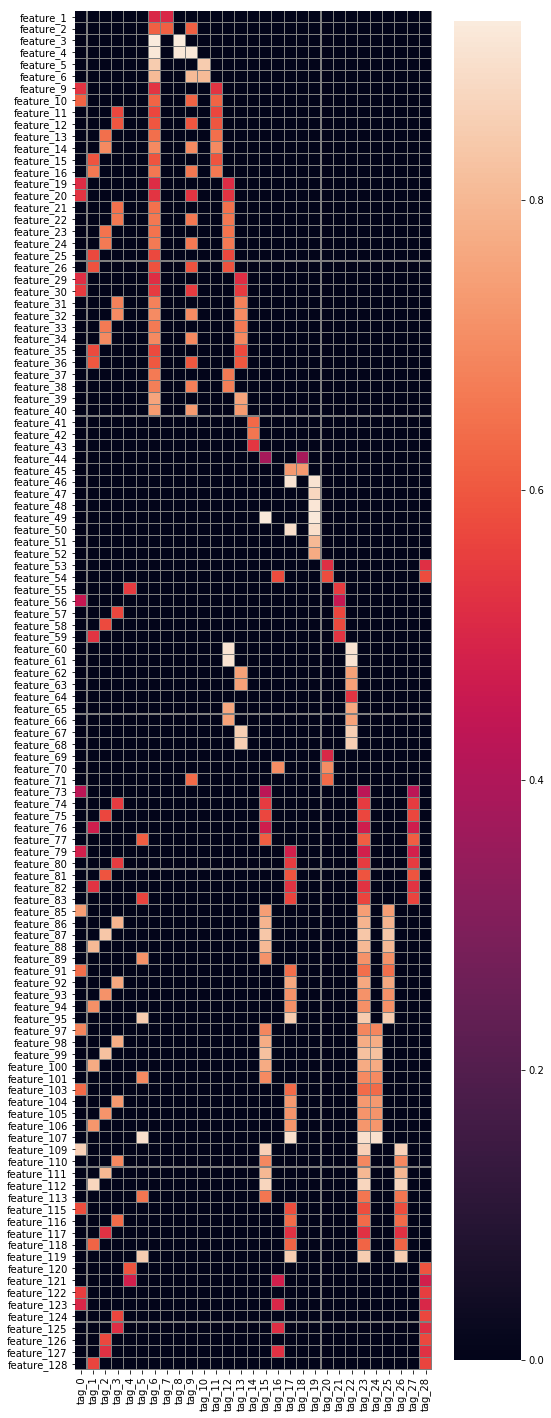

In [50]:
n_top = 10
features_pca_weights = (features*1).mul(abs(components.iloc[0:n_top,:]).sum(axis=0),axis=0).fillna(0).drop(['feature_0','feature_0_neg','feature_0_pos'])

fig, ax = plt.subplots(figsize=(8,25))     
sns.heatmap(features_pca_weights.loc[X_norm.columns.values[:-2]],cbar=True, linewidths=0.05, linecolor='gray')
plt.show()

In [51]:
#Average correlation score by tag
features_pca_weights.replace(0,np.NaN).mean(axis=0).sort_values(ascending=False)

tag_8     0.919500
tag_19    0.868014
tag_10    0.827650
tag_22    0.784744
tag_25    0.756690
tag_24    0.746440
tag_5     0.730637
tag_26    0.710390
tag_15    0.702655
tag_13    0.691893
tag_17    0.688978
tag_23    0.687015
tag_12    0.678686
tag_9     0.664533
tag_2     0.663400
tag_6     0.652685
tag_3     0.646812
tag_1     0.636919
tag_11    0.615387
tag_14    0.610300
tag_20    0.588840
tag_0     0.578812
tag_7     0.558850
tag_18    0.555450
tag_16    0.550267
tag_28    0.542436
tag_4     0.538167
tag_27    0.534540
tag_21    0.533980
dtype: float64

In [52]:
feature_importance = pd.DataFrame(abs(components).sum(axis=0).sort_values(ascending=False),columns=['PCA_weights_sum'])
feature_importance = feature_importance.merge(corr, left_index=True, right_index=True).drop(columns=['corr'])
feature_importance.rank(axis=0,ascending=False).rename(columns={'PCA_weights_sum':'PCA_rank','abs_corr':'abs_corr_rank'}).head(30)

,PCA_rank,abs_corr_rank
feature_44,1.0,56.0
feature_54,2.0,83.0
feature_56,3.0,74.0
feature_45,4.0,114.0
feature_6,5.0,60.0
feature_41,6.0,59.0
feature_86,7.0,65.0
feature_98,8.0,57.0
feature_12,9.0,32.0
feature_51,10.0,31.0


# Prediction

## Classification

Convert y/resp values to classes:

In [53]:
y_clean.describe()

count    850509.000000
mean          0.000386
std           0.025191
min          -0.482720
25%          -0.006881
50%           0.000069
75%           0.007252
max           0.407108
Name: resp, dtype: float64

In [54]:
n_classes = 2

In [55]:
low_pos_threshold = 0.01
low_neg_threshold = -low_pos_threshold

def resp_bands(x):
    if x<0:
        if x>low_neg_threshold:
            label = 'low_neg'
        else:
            label = 'high_neg'
    else:
        if x<low_pos_threshold:
            label = 'low_pos'
        else:
            label = 'high_pos'
    return label

if n_classes == 2:
    #3 classes: neg (i.e. loss), pos (i.e. profit)
    labels = ['neg','pos']
    y_label = y_clean.apply(lambda x: 'neg' if x<0 else 'pos')
elif n_classes == 3:
    #3 classes: neg (i.e. loss), low_pos, high_pos
    labels = ['neg','low_pos','high_pos']
    y_label = y_clean.apply(lambda x: 'neg' if x<0 else ('low_pos' if x<=low_pos_threshold else 'high_pos'))
elif n_classes == 4:
    #4 classes: low_neg, high_neg, low_pos, high_pos
    labels = ['high_neg','low_neg','low_pos','high_pos']
    y_label = y_clean.apply(lambda x: resp_bands(x))

In [56]:
y_clean.to_frame().join(y_label,lsuffix='_value', rsuffix='_label').head(20)

,resp_value,resp_label
39,-0.003846,neg
40,0.025578,pos
42,-0.001283,neg
43,0.004772,pos
44,0.045814,pos
45,-0.000058,neg
46,-0.049819,neg
47,0.003912,pos
48,-0.000302,neg
49,-0.003231,neg


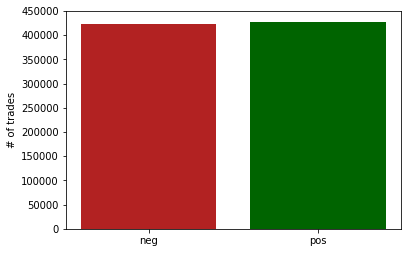

In [57]:
#Bar plot
x = list(range(0,n_classes))
height = [len(y_label[y_label==label]) for label in labels]
if n_classes == 2:
    colors = ['firebrick','darkgreen']
elif n_classes == 3:
    colors = ['firebrick','palegreen','darkgreen']
else:
    colors = ['firebrick','coral','palegreen','darkgreen']

plt.bar(x=x, height=height,color=colors)
plt.xticks(x, labels)
plt.ylabel('# of trades')
plt.show()

Remove class imbalance by undersampling:

In [58]:
#X_selected = X_norm
X_selected = X_pca

In [59]:
#Find number of samples in class with smallest number of samples 
min_samples = 10**9
for label in y_label.unique():
    min_samples = min(min_samples, len(y_label[y_label==label]))

#Randomly sample indices of samples to be removed from each class
id_drop = []
for label in y_label.unique():
    id_drop.extend(y_label[y_label==label].sample(len(y_label[y_label==label])-min_samples).index.values)

#Remove selected samples
y_label_balanced = y_label.drop(id_drop)
X_balanced = X_selected.drop(id_drop)

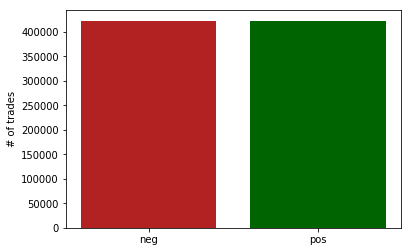

In [60]:
height = [len(y_label_balanced[y_label_balanced==label]) for label in labels]

plt.bar(x=x, height=height,color=colors)
plt.xticks(x, labels)
plt.ylabel('# of trades')
plt.show()

Split data into training and test set:

In [61]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_balanced.loc[:,X_balanced.columns.isin(selected_features)],y_label_balanced,test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_label_balanced,test_size=0.25, random_state=42)

### ML Models

In [62]:
def evaluate_model(train_labels, train_pred, test_labels, test_pred, labels):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('Results on training set:')
    print('Accuracy score: ', format(accuracy_score(train_labels, train_pred)))
    print('Precision score: ', format(precision_score(train_labels, train_pred,average=None)))
    print('Recall score: ', format(recall_score(train_labels, train_pred,average=None)))
    print('F1 score: ', format(f1_score(train_labels, train_pred,average=None)))
    print('---------------------------------------------------------------------')
    print('Results on test set:')
    print('Accuracy score: ', format(accuracy_score(test_labels, test_pred)))
    print('Precision score: ', format(precision_score(test_labels, test_pred,average=None)))
    print('Recall score: ', format(recall_score(test_labels, test_pred,average=None)))
    print('F1 score: ', format(f1_score(test_labels, test_pred,average=None)))
    print('---------------------------------------------------------------------')
    
    #Plot confusion matrix for test set
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(test_labels, test_pred, labels)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix - Test Set') 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

def run_model(models, model_name, train_data, train_labels, test_data, test_labels, label_encoder, labels):
    #model pipeline function
    
    #Get model
    model = models[model_name]
    
    #Fit model to training data
    model.fit(train_data, label_encoder.transform(train_labels.astype(str)))
    
    #Test model's performance on training data
    train_pred = model.predict(train_data)
    train_pred = label_encoder.inverse_transform(train_pred)
    
    #Test model's performance on test data
    test_pred = model.predict(test_data) 
    test_pred = label_encoder.inverse_transform(test_pred)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    #Print performance metrics
    print(model_name)
    print()
    print(label_encoder.inverse_transform(model.classes_))
    
    evaluate_model(train_labels, train_pred, test_labels, test_pred, labels)
    
    return model

In [63]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

models = dict()

models['Logistic Regression'] = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=42, multi_class='auto')
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
models['Linear SVM'] = SVC(kernel='linear', class_weight='balanced', random_state=42)
models['Cubic SVM'] = SVC(kernel='poly', class_weight='balanced', random_state=42)
for c in np.arange(0.1, 1.1, 0.1):
    models['RBF SVM (C = '+str(c)+')'] = SVC(C=c, class_weight='balanced', random_state=42)
models['Bagging'] = BaggingClassifier(n_estimators=50 ,random_state=42)
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=50 ,random_state=42)
models['AdaBoost'] = AdaBoostClassifier(n_estimators=50 ,random_state=42)

In [64]:
#encode training labels to an integer format that is interpretable by all sklearn classification models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(y_train.values.astype(str))

Logistic Regression

['neg' 'pos']
Results on training set:
Accuracy score:  0.5173943099567865
Precision score:  [0.51640655 0.51851229]
Recall score:  [0.54831195 0.48647335]
F1 score:  [0.53188121 0.50198212]
---------------------------------------------------------------------
Results on test set:
Accuracy score:  0.5184469696969697
Precision score:  [0.51725826 0.51979882]
Recall score:  [0.55056212 0.48634216]
F1 score:  [0.53339084 0.50251423]
---------------------------------------------------------------------


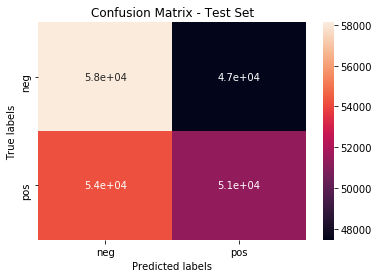

In [65]:
log_model =  run_model(models,'Logistic Regression',X_train,y_train,X_test,y_test,le,labels)

### Neural Nets

In [66]:
#one-hot encode labels
y_train_cat = pd.get_dummies(y_train)
y_test_cat = pd.get_dummies(y_test)

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(len(labels), activation='softmax'))


model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)  

In [69]:
#Set learning rate schedule

#https://dzlab.github.io/dltips/en/keras/learning-rate-scheduler/
#Constant then exponential decayed

from keras.callbacks import LearningRateScheduler

# Define configuration parameters
start_lr = 0.001
rampup_epochs = 10
exp_decay = 0

# Define the scheduling function
def schedule(epoch):
    def lr(epoch, start_lr, rampup_epochs, exp_decay):
        if epoch < rampup_epochs:
            return start_lr
        else:
            return start_lr * np.exp(-exp_decay * epoch)
    return lr(epoch, start_lr, rampup_epochs, exp_decay)

lr_schedule = LearningRateScheduler(schedule, verbose=1)

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [71]:
#Callback to plot loss while training
from plot_learning import PlotLearning
plot_learning = PlotLearning()

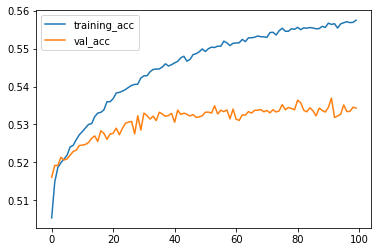

In [72]:
from keras.callbacks import EarlyStopping

epochs = 100
batch_size = 512

hist = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=[X_test,y_test_cat], callbacks=[plot_learning,lr_schedule], verbose=0)
#callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]

In [73]:
#Get predictions on training and test set
y_pred_train = np.argmax(model.predict(X_train),axis=1)
y_pred_test = np.argmax(model.predict(X_test),axis=1)

In [74]:
#Define function to decode the integer predictions back to class names
def decode_one_hot(results, labels):
    predicted_class = []
    for i in range(len(results)):
        predicted_class.append(labels[results[i]])    
    return predicted_class

y_pred_train = decode_one_hot(y_pred_train, y_train_cat.columns.values)
y_pred_test = decode_one_hot(y_pred_test, y_train_cat.columns.values)

['neg' 'pos']
Results on training set:
Accuracy score:  0.5710166383100956
Precision score:  [0.55265676 0.60907755]
Recall score:  [0.74559366 0.39642088]
F1 score:  [0.63478874 0.48026143]
---------------------------------------------------------------------
Results on test set:
Accuracy score:  0.5343181818181818
Precision score:  [0.52547221 0.55244654]
Recall score:  [0.70641107 0.36228069]
F1 score:  [0.6026535 0.4375965]
---------------------------------------------------------------------


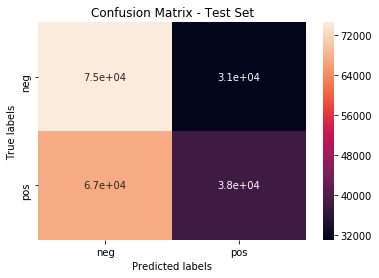

In [75]:
print(y_train_cat.columns.values)
evaluate_model(y_train, y_pred_train, y_test, y_pred_test, labels)